# 3. Classification

The most common supervised learning tasks are **regression** and **classification**. We already worked through a ML project involving regression (housing prices), so it's time to give classification some of the attention it deserves.  

#### MNIST

In this Chapter, we will use the classic MNIST dataset, probably the most common dataset for image classification. 

Indeed, we can download MNIST directly from scikit-learn:  

In [1]:
import os
import numpy as np
import sklearn

In [2]:
# working on the 8x8 digits dataset (instead of MNIST)
from sklearn.datasets import load_digits

digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [17]:
X, y = digits["data"], digits["target"]

In [19]:
X.shape

(1797, 64)

In [20]:
y.shape

(1797,)

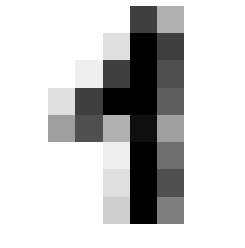

In [10]:
# visualizing a digit

import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[42]
some_digit_image = some_digit.reshape(8, 8)
plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [11]:
y[42]

1

In [15]:
# y as integers
y = y.astype(np.uint8)

In [26]:
# keeping the 6/7 : 1/7 ratio as in the book
X_train, X_test, y_train, y_test = X[:1542], X[1542:], y[:1542], y[1542:]

#### Binary classifier

A binary classifier will be able to distinguish between two classes: "X" and "not-X". For example:

In [48]:
y_train_1 = (y_train == 1) # True for 1, False otherwise
y_test_1 = (y_test == 1)

Let's start with with a Stochastic Gradient Descent (SGD) classifier:

In [49]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42) # ensure consistency across different runs
sgd_clf.fit(X_train, y_train_1)

C:\Users\Giuseppe\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [50]:
sgd_clf.predict([some_digit]) # some_digit = 1

array([ True])

Wrong! Let's check accuracy.

In [52]:
# implementation

from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)
for train_index, test_index in skfolds.split(X_train, y_train_1):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.9221789883268483
0.9163424124513618
0.9688715953307393


C:\Users\Giuseppe\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\Giuseppe\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\Giuseppe\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and t

In [53]:
# more simply

from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

C:\Users\Giuseppe\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\Giuseppe\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\Giuseppe\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and t

array([0.92217899, 0.91634241, 0.9688716 ])

Well, one thing to remember is that an hypothetical *always not-1* classifier would get 90% accuracy here. Easy win, but useless.

Let's use a **confusion matrix** instead:

In [54]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_1, cv=3)

C:\Users\Giuseppe\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\Giuseppe\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\Giuseppe\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and t

In [55]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_1, y_train_pred)

array([[1353,   33],
       [  66,   90]], dtype=int64)

Rows = actual class
Cols = predicted class

Negatives | Positives 
------------ | ------------- 
False negatives | True positives 
True negatives | False positives